/var/folders/3d/thk4g7jj4d52ms21t3_17w_h0000gn/T/ipykernel_32176/3751146160.py:35: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


     Temperature_F  Frzn_Custard_Sales
0               75              3140.0
1               63              2448.0
2               85              2970.0
3               82              2728.0
4               66              2102.0
..             ...                 ...
175             72              2556.0
176             72              2616.0
177             91              3415.0
178             94              3469.0
179             87              3378.0

[180 rows x 2 columns]


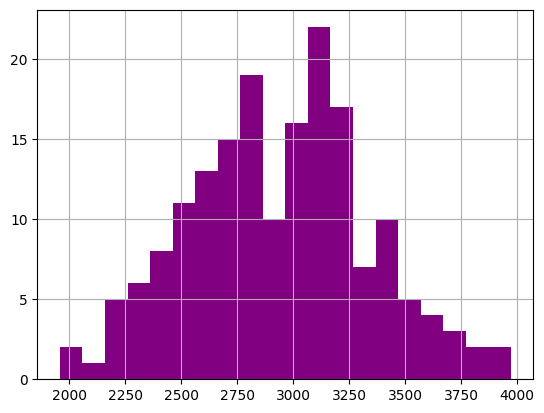

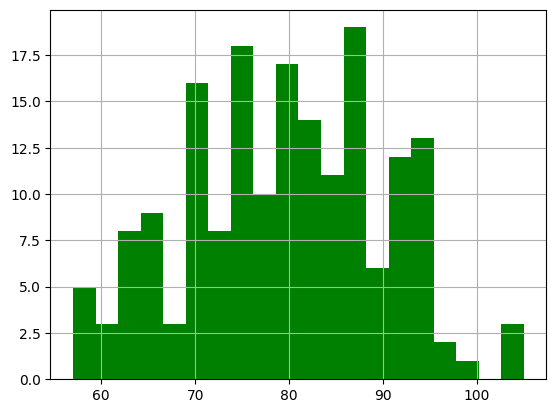

Custard Sales_mean =  2936.38202247191
Temperature_mean =  79.40449438202248
Custard Sales_sample_standard_deviation =  399.34381221317136
Temperature_sample_standard_deviation =  10.384929433916529
Custard Sales_standard_error =  29.932084205818445
Temperature_standard_error =  0.7783833698706291


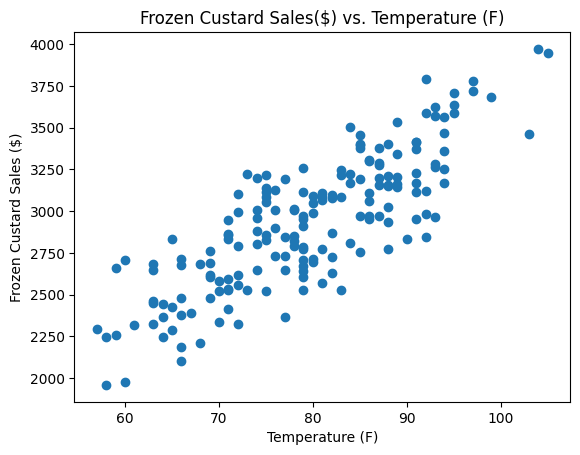

stats and p =  0.823046239446803 4.2057800886714216e-45
                            OLS Regression Results                            
Dep. Variable:     Frzn_Custard_Sales   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     369.6
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           4.21e-45
Time:                        22:03:17   Log-Likelihood:                -1217.6
No. Observations:                 178   AIC:                             2439.
Df Residuals:                     176   BIC:                             2445.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

/var/folders/3d/thk4g7jj4d52ms21t3_17w_h0000gn/T/ipykernel_32176/3751146160.py:174: RuntimeWarning: overflow encountered in double_scalars
  cost = (1/2*m) * np.sum(np.square(predictions-y))
/var/folders/3d/thk4g7jj4d52ms21t3_17w_h0000gn/T/ipykernel_32176/3751146160.py:174: RuntimeWarning: overflow encountered in square
  cost = (1/2*m) * np.sum(np.square(predictions-y))
/var/folders/3d/thk4g7jj4d52ms21t3_17w_h0000gn/T/ipykernel_32176/3751146160.py:194: RuntimeWarning: invalid value encountered in subtract
  theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     369.6
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           4.21e-45
Time:                        22:03:18   Log-Likelihood:                -151.88
No. Observations:                 178   AIC:                             307.8
Df Residuals:                     176   BIC:                             314.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.325e-16      0.043  -5.43e-15

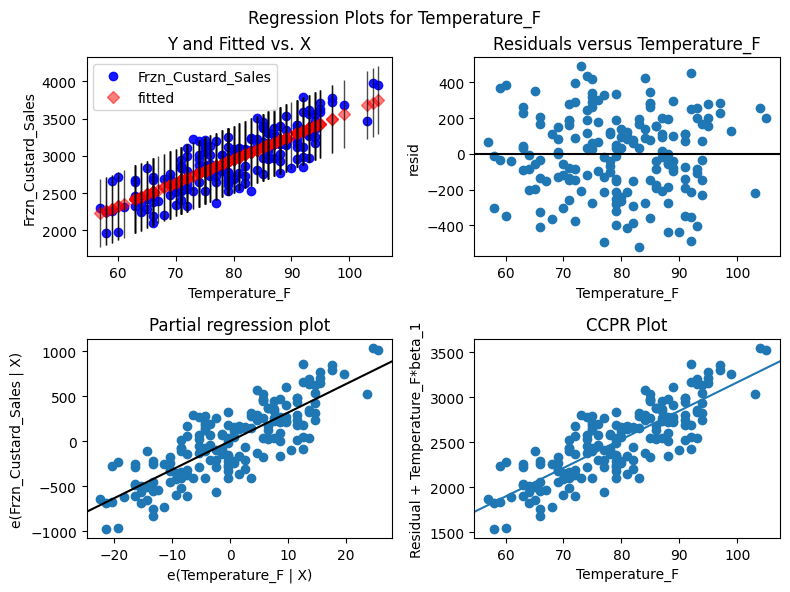

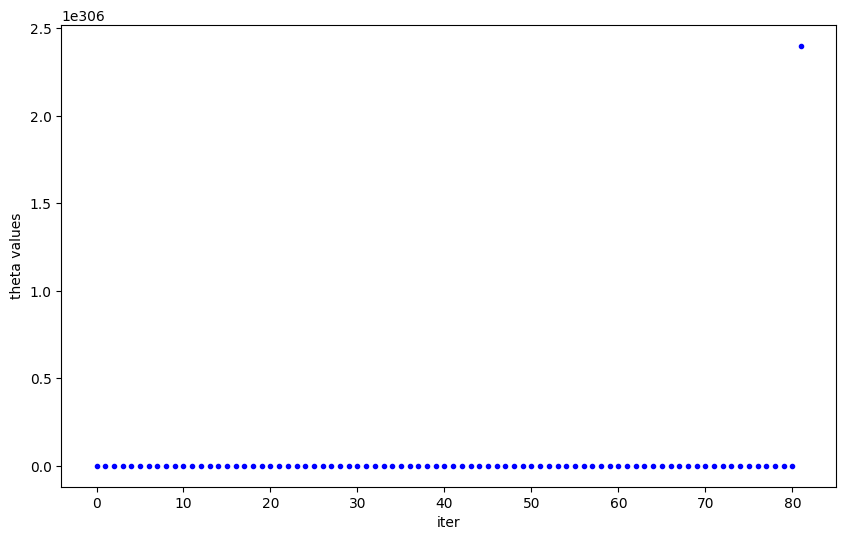

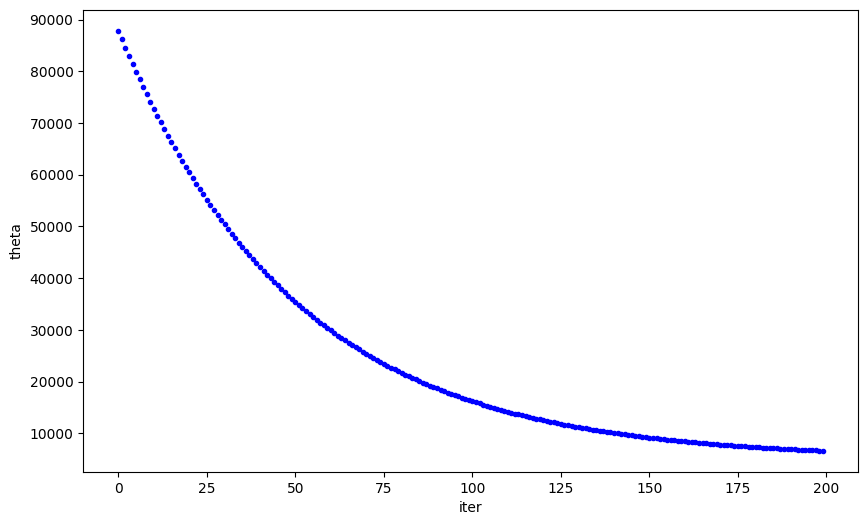

In [1]:
#Nedim Hodzic
#Exercise 04 : T54-574

#Section 1 Question Prompt
#A friend of yours works at the local frozen custard place. On hot days, she says her work is harder. It
#feels like she doesn’t get a break. She says it is because they have too many customers. However, even
#before your friend started working there, she always seemed tired and cranky when the weather was
#hot. You think it is because she doesn’t tolerate the heat well. She makes a bet with you that there really
#are more customers on hot days. She gets data on the sales numbers and the daily temperatures.

#Section 1 Solution
#1. What is the outcome?
# The outcome is to prove whether or not there are more customers on hot days.
#2. What is the main effect/predictor she wants to understand the impact of?
# Wants to understand the main effect of heat on customers coming to her store for custard. 
#3. What is the hypothesis?
# The null hypothesis is that there is no significant difference with the average number of customer sales on hot and days that are not hot
# The alternative hypothesis is that there is a significant difference in the average number of customer sales on hot and not hot days


#Question 1
# 1. An explanation of why the analysis is being conducted and what the hypotheses are
# See Section 1 answers above. 

#Question 2 
# Descriptive information about the data, including summary statistics (such as number of
# observations, measures of central tendency, & measures of dispersion) and plots of the data
# distributions

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import sem
from scipy.stats.stats import pearsonr
import statsmodels.api as sm
from scipy.stats import chi2_contingency


#Bar graphs depicting distribution
df = pd.read_excel('/Users/nedim/Downloads/frzn_custard.xlsx')
print(df)
Frozen_Custard_Array = df['Frzn_Custard_Sales']
Nan_Frozen_Custard_Array = np.isnan(Frozen_Custard_Array)
NotNan_Array = ~Nan_Frozen_Custard_Array

#Create Array not including NA values
Frozen_Custard_Array = Frozen_Custard_Array[NotNan_Array]

Temperature_Array = df['Temperature_F']
Temperature_Array = Temperature_Array[NotNan_Array]

Frozen_Custard_Array.hist(bins=20, color = 'purple')
plt.show()
Temperature_Array.hist(bins=20, color = 'green')
plt.show()

#Summary Statistics
df.describe()

#Compute the sample means, standard deviations, and standard errors of x1, x2, x3, & x4
salesmean = np.mean(Frozen_Custard_Array)
tempmean = np.mean(Temperature_Array)

sales_sample_standard_deviation = np.std(Frozen_Custard_Array, ddof =1)
temp_sample_standard_deviation = np.std(Temperature_Array, ddof =1)

sales_standard_error = sem(Frozen_Custard_Array)
temp_standard_error = sem(Temperature_Array)

print('Custard Sales_mean = ', salesmean)
print('Temperature_mean = ', tempmean)

print('Custard Sales_sample_standard_deviation = ', sales_sample_standard_deviation)
print('Temperature_sample_standard_deviation = ', temp_sample_standard_deviation)

#Temp standard error is an NaN value?
print('Custard Sales_standard_error = ', sales_standard_error)
print('Temperature_standard_error = ', temp_standard_error)


#Question 3
#Descriptive information about the relationships between the two variables, including correlation
# and scatterplots

#Scatter Plot
plt.scatter(Temperature_Array, Frozen_Custard_Array)
plt.title('Frozen Custard Sales($) vs. Temperature (F)')
plt.xlabel('Temperature (F)')
plt.ylabel('Frozen Custard Sales ($)')
plt.show()

#Correlation
stats,p = pearsonr(Temperature_Array,Frozen_Custard_Array)
print ("stats and p = ", stats,p)

#Question 4
#A regression analysis to test the hypothesis. If you have trouble getting the regression analysis
#to work, look closely at the data. Your friend wasn’t always able to get sales data for each day.
#Rows with missing data will need to be removed.

#response variable
y = Frozen_Custard_Array
#explanatory variable
x = Temperature_Array
#add constant to predictor values
X=sm.add_constant(x)
#fit linear regression model
model = sm.OLS(y, X).fit()
#print results
print(model.summary())

#Question 5
#A description of the results of the analysis. Included in this description should be an
#interpretation of the coefficients, description of the goodness of fit, and a discussion of whether
#the results are statistically significant.

# 68% of frozen custard sales can be explained by the temperature data, hence R^2 = 0.68
# p.ltl = 0.00, less than 0.05, therefore we can say that there is a statistically significant association between temp and custard sales. 
# F-statistic: 369.6, p value: 4.21e-45. These tells us the overall significance of the regression model
# therefor our model is statistically significant and temperature is deemed to be useful for explaining the variation in Frozen Custard Sales

#Coefficients: 423.26, 31.65 - Temperature
#From the model summary we know that our fitted regression equation is: Sales = 423.23 + 31.65*(temperature)
#Tells us that each degree increase in temperature increases the sales amount by $ 31.65
#If the temperature were at 0 deg F, our regression equation tells us that sales would be approximately $423.23

#Goodness of fit: 
#Create a contingency table. 
data_crosstab = pd.crosstab(Temperature_Array, Frozen_Custard_Array, margins = False)
#Chi^2
chi2_stat, chi2_p, chi2_dof, chi2_expected = chi2_contingency(data_crosstab)
print("chi2_contingency =", p)

#define figure size
fig = plt.figure(figsize=(8,6))

#produce residual plots
fig = sm.graphics.plot_regress_exog(model,exog_idx = 'Temperature_F', fig=fig)

#Section 2

#Write a program in Python that uses gradient descent to find the regression coefficients or
#the frozen custard data in Section 1. There are many examples of how to do this on the internet.
#Most of these examples use the np.dot rather than np.matmul. Make sure your program
#uses np.matmul instead.

# To implement gradient descent, the following is required: 
#1. A cost function that needs to be minimized, 
#2. The number of iterations, 
#3. A learning rate to determine the step size at each iteration while moving towards the minimum, 
#4. Partial derivates for weight & bias to update the parameters at each iteration, 
#5. A prediction function

#Copied from link - code below


Frozen_Custard_Array = Frozen_Custard_Array[NotNan_Array].values.reshape(-1,1)

def  cal_cost(theta,X,y):
    '''
   
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
   
    where:
        j is the no of features
    '''
   
    m = len(y)
   
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate
    iterations = no of iterations
   
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
       
        prediction = np.dot(X,theta)
       
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
       
    return theta, cost_history, theta_history


lr =0.01
n_iter = 200
theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(Temperature_Array),1)),Temperature_Array]
theta,cost_history,theta_history = gradient_descent(X_b,Frozen_Custard_Array,theta,lr,n_iter)

#a.Cite the source you used
# Main Source: https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f
# Other Source:https://cmdlinetips.com/2020/03/linear-regression-using-matrix-multiplication-in-python-using-numpy/
# Other Source: https://medium.com/analytics-vidhya/multiple-linear-regression-from-scratch-using-only-numpy-98fc010a1926


#b.This problem is an example of how gradient descent can fail with raw data. There are
#more sophisticated modifications to gradient descent that address those failures. When
#you try this problem, it will not converge. Try it anyway and graph the loss function over
#iterations so that you can see what is happening.

#****The code below is copied from the first cited source above****

fig,ax = plt.subplots(figsize=(10,6))

ax.set_ylabel('theta values')
ax.set_xlabel('iter')
_=ax.plot(range(n_iter),cost_history,'b.')

#note: plot does not converge

#c.Standardize your X and Y variables. To do this, subtract the mean from each value and
#divide it by the standard deviation. Please note that the input array for X needs to have a column of 1’s in it. 
#Do not standardize the 1’s.
x=Temperature_Array[NotNan_Array]
y=Frozen_Custard_Array
x1=(x-np.mean(x))/(np.std(x))
y1=(y-np.mean(y))/(np.std(y))

#d.Rerun your section 1 model using the standardized inputs. Compare your results using
#gradient descent and using the module you used in Section 1 for the standardized
#inputs.
#Model from Section 1
#add constant to predictor values
X1=sm.add_constant(x1)
#fit linear regression model
model = sm.OLS(y1, X1).fit()
#print results
print(model.summary())

#e. Plot the loss (i.e. cost) function over the iterations

X_b = np.c_[np.ones((len(x1),1)),x1]
theta = np.random.randn(2,1)
theta,cost_history,theta_history = gradient_descent(X_b,y1,theta,lr,n_iter)
fig,ax = plt.subplots(figsize=(10,6))
ax.set_ylabel('theta')
ax.set_xlabel('iter')
_=ax.plot(range(n_iter),cost_history,'b.')




